OA

1/17/25

Intensive Data Science II

Q2 Project

# OS Q2 PROJECT: NFL TEAM STATISTICS FROM 2003-2023 

# Table of Contents: #

[Introduction](#Introduction)

[Dataset](#Dataset)

[Do penalties affect a teams number of wins?](#DO-PENALTIES-AFFECT-A-TEAMS-NUMBER-OF-WINS?)

[Total yards per season by state](#TOTAL-YARDS-PER-SEASON-BY-STATE)

[Win percentage compared to offensive effectiveness](#WIN-PERCENTAGE-COMPARED-TO-OFFENSIVE-EFFECTIVENESS)

[Conclusion](#CONCLUSION)

[Sources](#SOURCES)

# Introduction #

Here I have the data from NFL teams from 2003-2023, giving me every stat about them, from their points scored to their fumbles lost. Below, I point out three visualizations that will leave you thinking new ideas about the game and the league. For the first plot, I take a chunk out of the argument that penalties directly affect a team's record. In the second plot, I introduce the idea of polarity not between individual teams, but the states the NFL teams are in. Finally, in the third plot, I compare the offensive effectiveness to the win percentage to show people the importance of defence in a team. I hope as you read you start to think new thoughts and formulate new ideas you did not think you were going to formulate going into this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

df = pd.read_csv('team_stats_2003_2023.csv')

# Dataset

In [2]:
df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


In [3]:
df.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

# DO PENALTIES AFFECT A TEAMS NUMBER OF WINS? #

In this plot, I took the data from the wins each team had in a season and the amount of penalties that were called on a team in season and put them up against each other, with a twist. I used a histogram to compare the values, but I created a shared x-axis for two graphs, where on the top, I only used the data for the teams with less than 5.5 wins, or the worst teams in the league for those seasons, and on the bottom I used the data for the teams with more than 10.5 wins, or the best teams in the league for those seasons. The goal was to see if there was a difference in the amount of penalties called on the best vs the worst teams in the league, and going into it, I did expect there to be an obvious difference. However, once the graph was complete, I noticed that the values were very similar, with the better teams only averaging about four less penalties called on them a season, which is almost no difference in the NFL. I found this very interesting and while it does not destroy the other argument that there is a correlation between less penalties called on you and more wins, it widens the conversation more and makes people think about the relationship. 

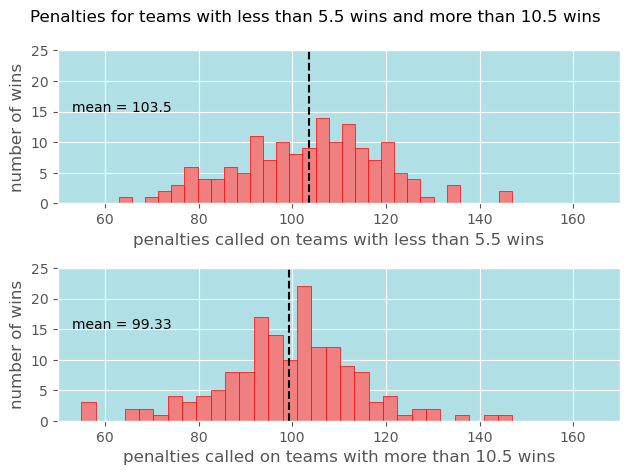

In [4]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Penalties for teams with less than 5.5 wins and more than 10.5 wins')
ax1.set_facecolor('powderblue')
ax2.set_facecolor('powderblue')
ax1.set_xlabel('penalties called on teams with less than 5.5 wins')
ax1.set_ylabel('number of wins')
ax2.set_xlabel('penalties called on teams with more than 10.5 wins')
ax2.set_ylabel('number of wins')

#import data
z1 = df[df['wins']<5.5]['penalties']
z2 = df[df['wins']>10.5]['penalties']
ax1.hist(z1, bins=30, color='lightcoral', edgecolor='red')
ax2.hist(z2, bins=30, color='lightcoral', edgecolor='red')

#finding means for each one and displaying
mean = round(z1.mean(), 2)
ax1.vlines(mean, 0, 170, color='black', linestyle='--')
ax1.annotate(f"mean = {mean}", (53, 15))

mean = round(z2.mean(), 2)
ax2.vlines(mean, 0, 170, color='black', linestyle='--')
ax2.annotate(f"mean = {mean}", (53, 15), color='black')

#making graph look better
ax1.set_xlim(50,170)
ax2.set_xlim(50,170)
ax1.set_ylim(0,25)
ax2.set_ylim(0,25)

fig.tight_layout()

# TOTAL YARDS  PER SEASON BY STATE #

In this plot, I first had to go back to the dataset and bring it into google sheets, where I deleted everything except the team name. From there, I manually added in the state where every team was based in. For teams that have relocated within the time period of 2003-2023, I just chose where they were during the 2008 season to put them down as, because 2008 season was the year the Giants won the superbowl and I had no better ideas. After I had sorted each team into their state, I created a plot where the teams were grouped into their state, and their total yards for every season from 2003-2023 were averaged to create a statewide average. The higher average total season yards got darker red and the ones with not as much were lighter orange or close to white. Not every state has an NFL team, so the ones that don't are just white. From this data, we can see some interesting things, especially comparing states that have multiple teams vs only one. There seems to be a lot of polarity with states that only have one team, and we can see that with states such as Massachusetts, Louisiana, and Illinois. For these states the only teams are the Patriots, the Saints, and the Bears, respectively. When comparing the average total yards, the Patriots and the Saints have a lot, while the Bears have the least in the country. Noticing this, you would not expect polarity among states that have multiple teams, because the polarity should average out to create a statewide average that is perfectly, well, average. However, in most cases, there is polarity with these states. Let's take New York and Texas for example, two states with multiple well-known franchises. WIth New York, the average total yards in a season is 5,210, and with Texas, it is 5,624 yards. This is a very large difference, and because it is over the span of 20 years, it makes it even more noticeable, and we can see that with the choropleth scale, where Texas is noticeably darker than New York. This could be the start of an argument that there is not polarization just between individual teams in the NFL, but states, and depending on which state your team is located in, your success in terms of total yards in a season can be estimated.

In [5]:
codes = pd.read_csv('STATECODES - Sheet1.csv')
df_new = pd.merge(df, codes, left_on= "team", right_on= "Team", how = "left")
df_new.head()
df_state_avg = df_new.groupby("State", as_index=False)["total_yards"].mean()

# Create choropleth map
fig = px.choropleth(df_state_avg, 
                     locations='State', 
                     locationmode="USA-states",  # choosing location
                     color='total_yards',  # making color based on the total yards
                     scope="usa",
                     color_continuous_scale="OrRd",  # creating the color of the choropleth scale
                     title="Average Total Season Yards by State (NFL) 2003-2023")

fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'STATECODES - Sheet1.csv'


# WIN PERCENTAGE COMPARED TO OFFENSIVE EFFECTIVENESS #

In this plot, I used plotly express again to create a graph with more than two variables at play. I knew I wanted to calculate the offensive effectiveness of a team, so I scrolled through the different categories of data, and determined that the best two to use would be the number of first downs a team gets in a season and the number of turnovers they have. On one hand, you want to have a lot of first downs, and on the other, you don't want to have a lot of turnovers. Once I had laid that data out on the graph, I noticed that there was a noticeable correlation comparing the first downs to the turnovers. I then set a color scale to the graph, so the teams with the most wins would be in yellow and the teams with the least wins would be blue. Once that was done, I had created some interesting looking data visualizations. What I did was I proved how important defense is in modern football. You can have high offensive effectiveness and not win a lot of games, and you can have low offensive effectiveness, and win a lot of games. Let's take a closer look at the 2020 Atlanta Falcons and the 2005 Chicago Bears. The 2020 Atlanta Falcons were extremely good offensively on paper, 366 first downs and only 18 turnovers. However, they only won a quarter of their games, finishing 4-12. The Chicago Bears were terribly offensively on paper, only completing 233 first downs, the fifth least from 2003-2023, and having 28 turnovers. However, the Chicago Bears went on to win about seventy percent of their games. In this modern era where the NFL is criticised for being too offense heavy, it is a relief to see tha the hate has no backbone to their argument. 

In [555]:
import plotly.express as px
fig = px.scatter(df,x='first_down', y='turnovers',
hover_name='team', # can see both team name and year when you hover
hover_data='year',
color='win_loss_perc',
range_x=(180,450), # making the data readable
range_y=(5,50))
fig.show()

slope, intercept, r, p, se = stats.linregress(df['first_down'], df['turnovers'])
print(r**2)

0.13275529312140327


# CONCLUSION #

In conclusion, I the team data from the NFL from 2003-2023 to create three interesting data visualizations, each one of which is made to leave the viewer learning something or thinking something they did not know or were not thinking before this. For the first graph, I took a chunk out of the argument that penalties directly affect a team's record. In the second graph, I introduced the idea of polarity not between individual teams, but the states the NFL teams are in. Finally, in the third graph, I. compared the offensive effectiveness to the win percentage to show people the importance of defence in a team. I hope readers can look upon this and gather new information and/or ideas they did not have in their brain before.


# SOURCES #

- Dataset from Kaggle: https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023/data
- Rahul Boaz for consult on the choropleth
- ChatGPT to clean up some minor mistakes 